### Importing libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, mean_squared_error


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alirezachahardoli/customer-data-clustring")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alirezachahardoli/customer-data-clustring/versions/1


Reading Datasets

In [ ]:
# Reading datasets
data = pd.read_csv("/root/.cache/kagglehub/datasets/alirezachahardoli/customer-data-clustring/versions/1/Customer-Data - 2.csv")
display(data.head())


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### EDA

In [ ]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# descriptive statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204822,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634780,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Checking if any null values present in the datasets

In [ ]:
#checking Null values
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Handling missing values
data = data.dropna()

# 1.  Data preprocessing:

## 1.a Visualize distributions of each features in the datasets

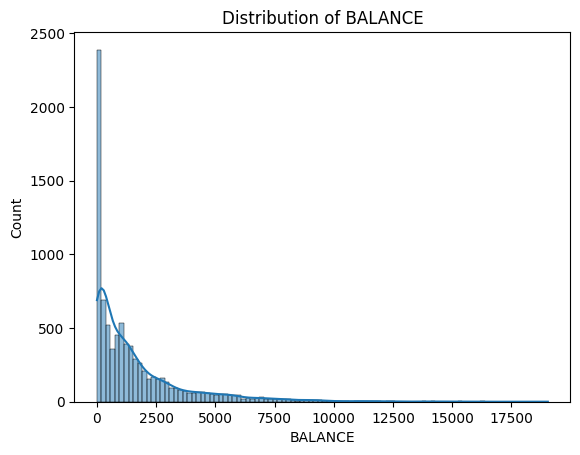

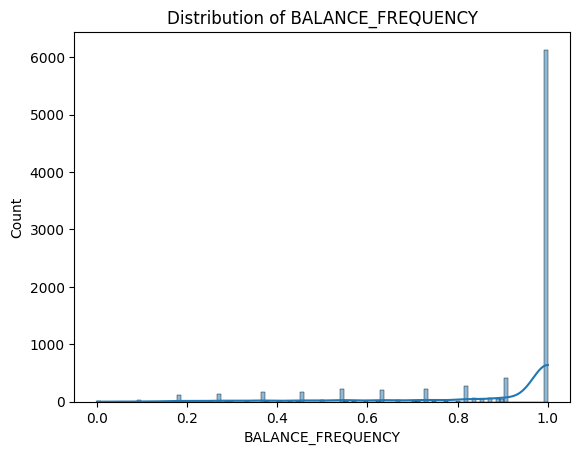

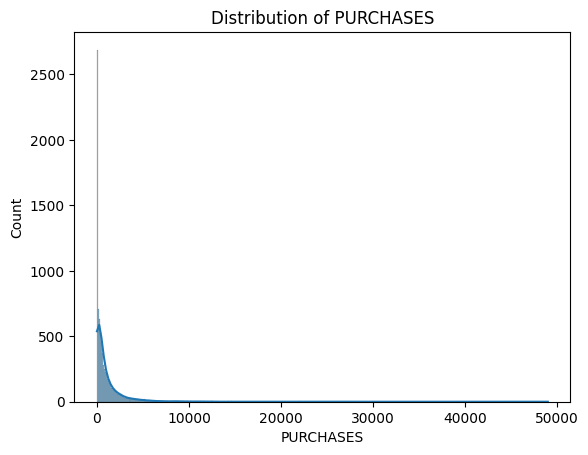

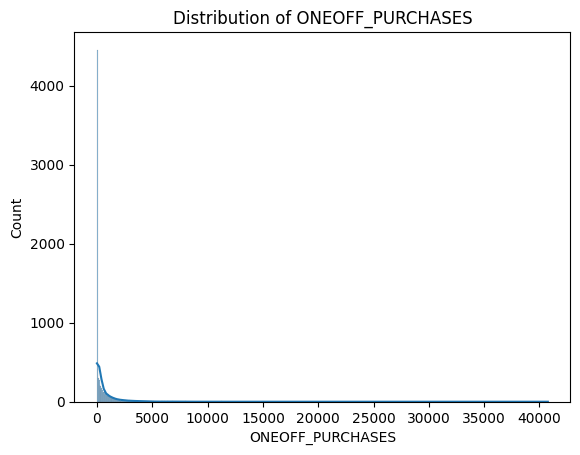

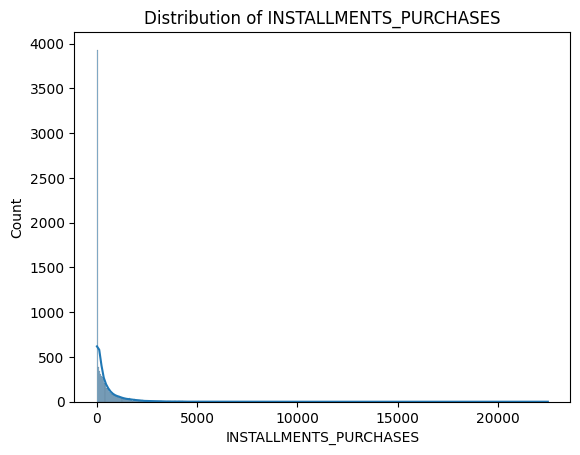

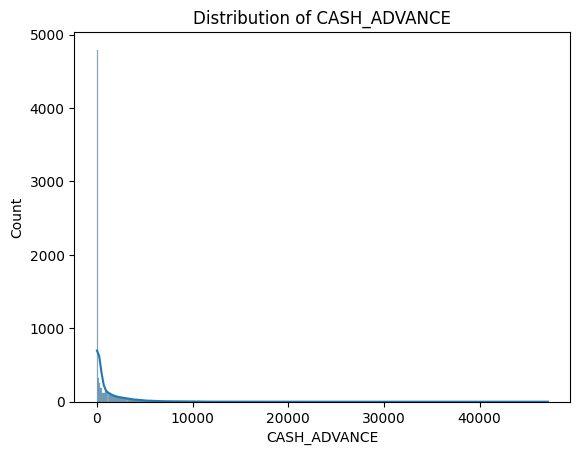

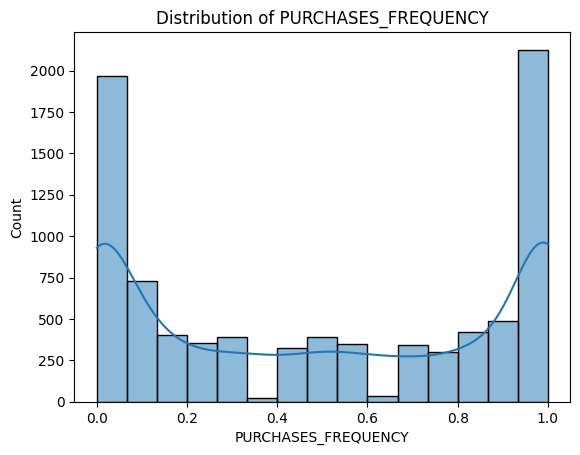

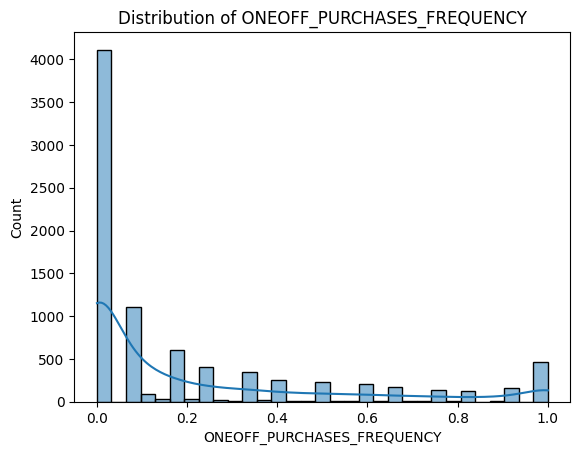

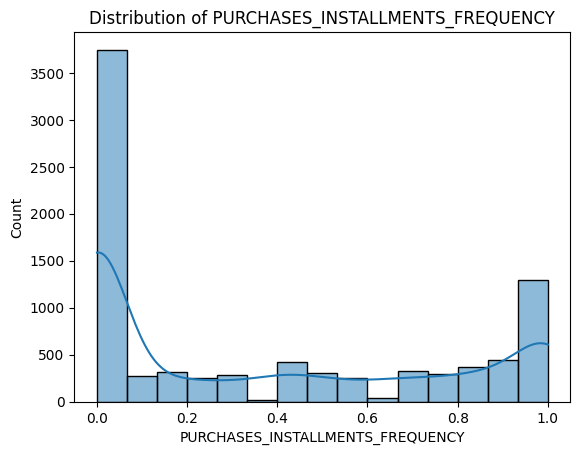

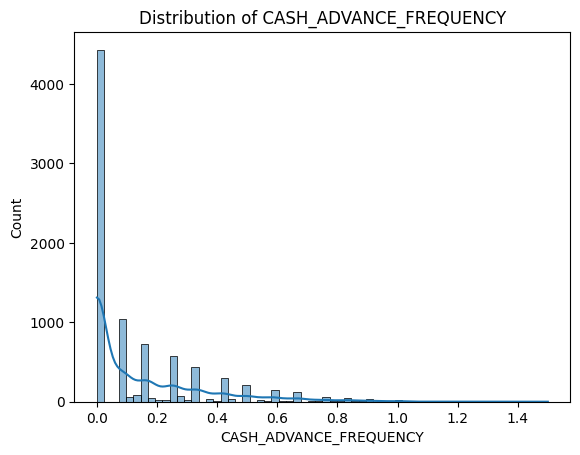

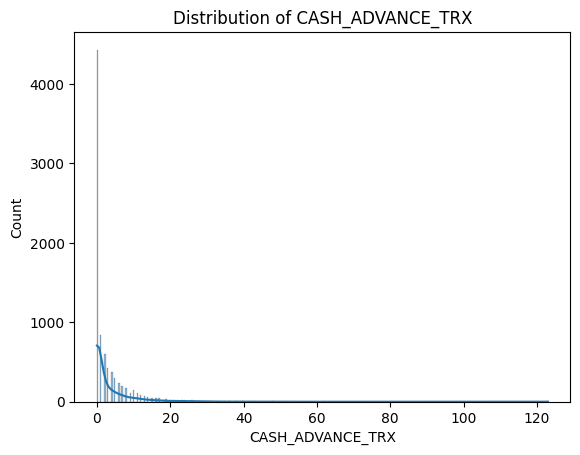

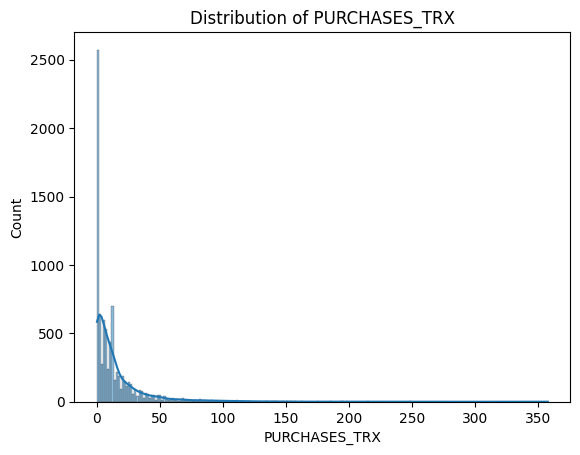

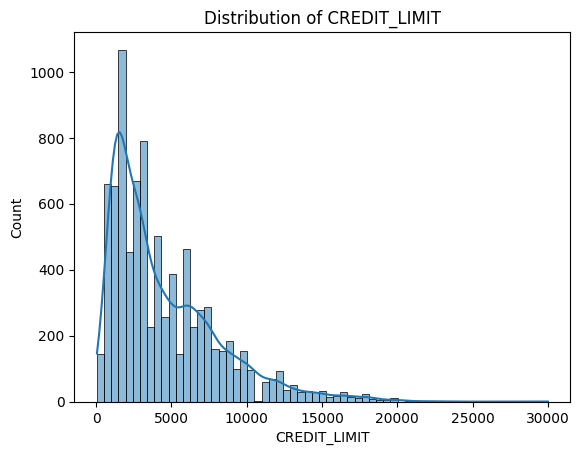

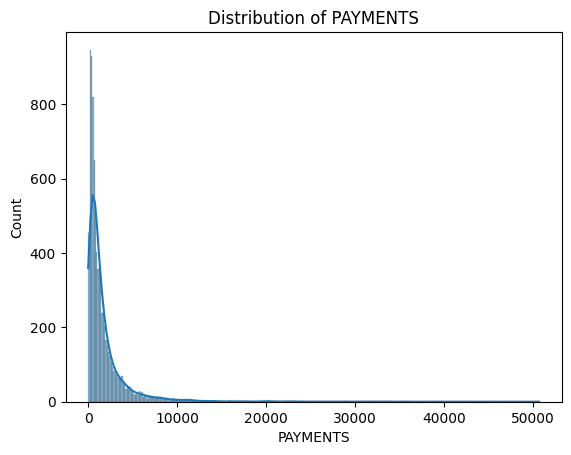

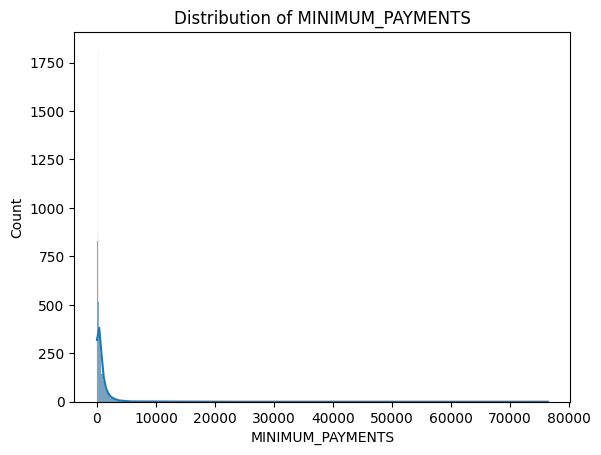

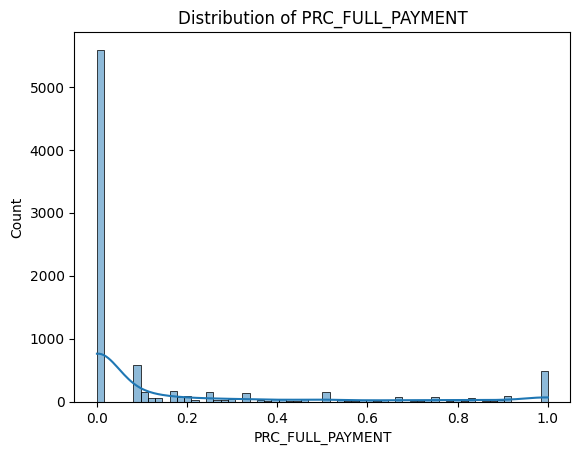

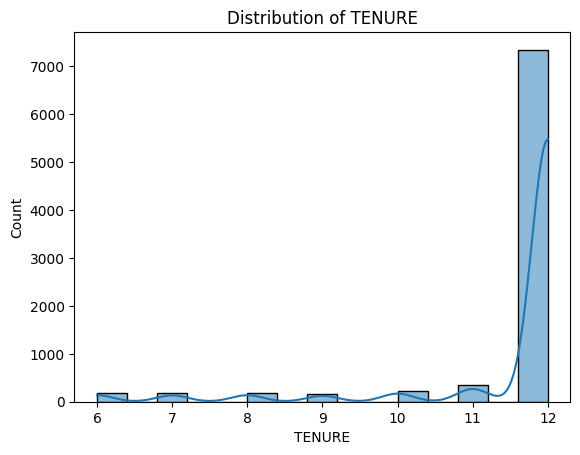

In [ ]:
#Visualize distributions of each features in the datasets
for column in data.select_dtypes(include=np.number).columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


### Here done transformations (log transformation for skewed data)

###and Normalized the datasets using StandardScaler

In [ ]:
for column in data.select_dtypes(include=np.number).columns:
    if data[column].skew() > 1:
        data[column] = np.log1p(data[column])  # log(1 + x) to handle zero values

# Normalization using standard scaler
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=np.number)),
                               columns=data.select_dtypes(include=np.number).columns)
# printing normalize darasets
print(data_normalized.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.334707          -0.370047  -0.123312         -0.996024   
1  0.952729           0.067679  -1.686451         -0.996024   
2  0.821135           0.505405   0.589495          1.049151   
3  0.233137           0.505405  -0.717052         -0.124918   
4  0.651839           0.505405   0.775749         -0.996024   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.381976     -0.937894            -0.820769   
1               -1.096108      1.518315            -1.236139   
2               -1.096108     -0.937894             1.256077   
3               -1.096108     -0.937894            -1.028455   
4                1.232117     -0.937894             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.740409                         -0.717179   
1                   -0.740409                         -0.926522   
2                    2.440893      

### Visualizing distribution of normalized datasets

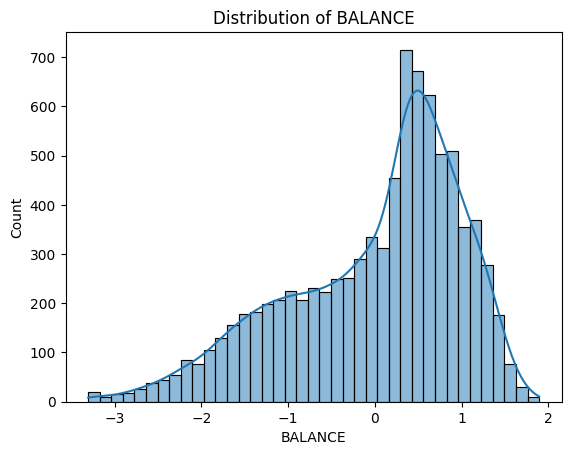

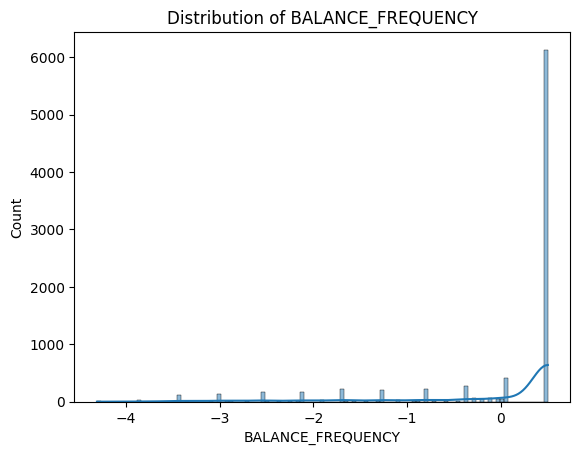

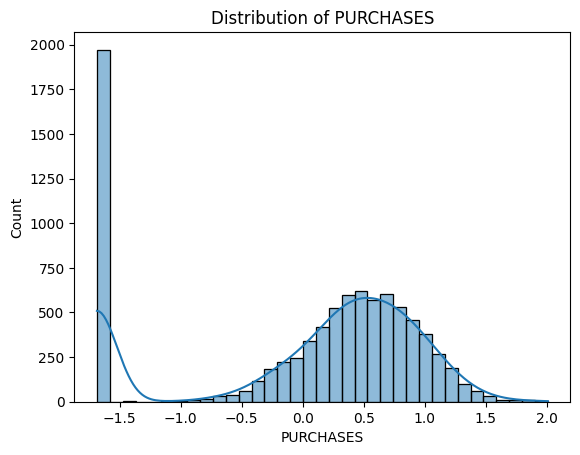

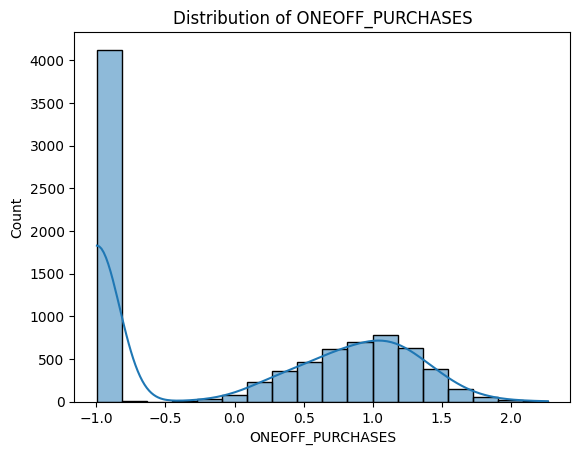

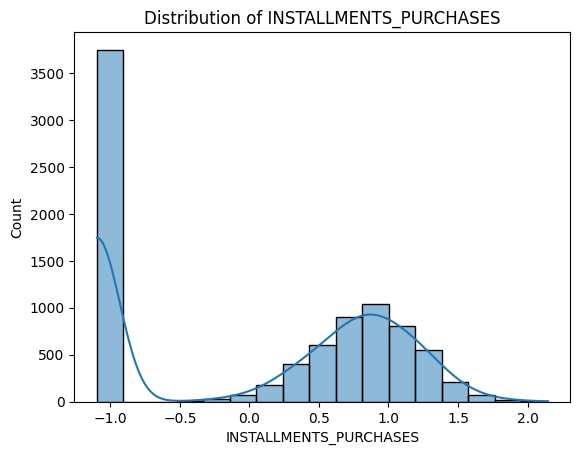

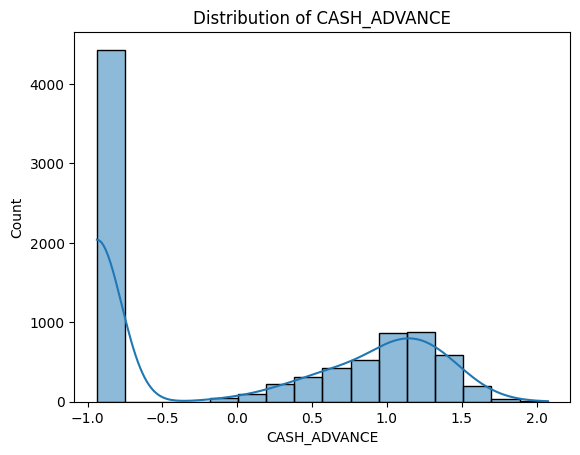

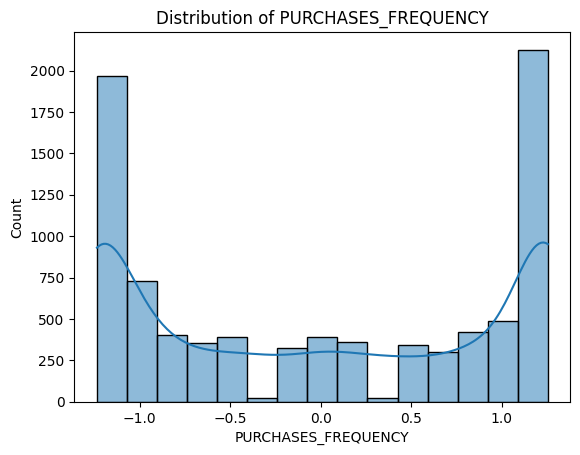

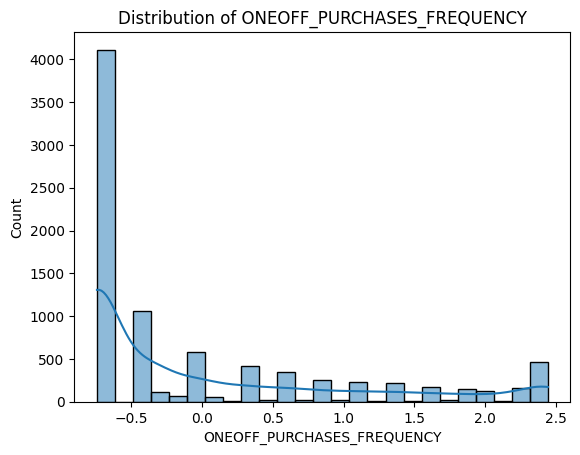

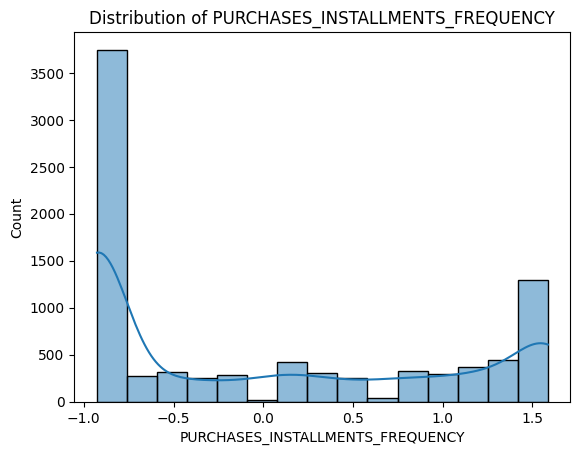

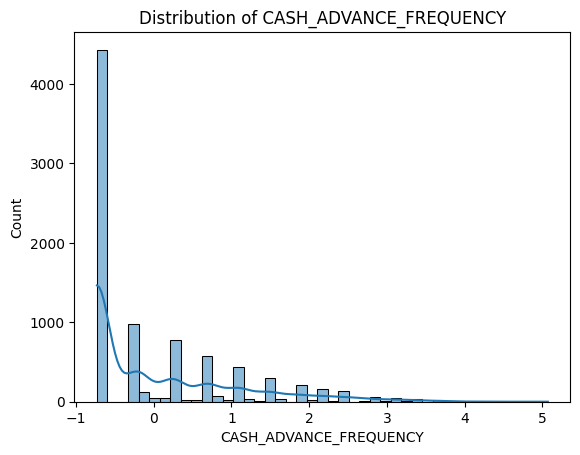

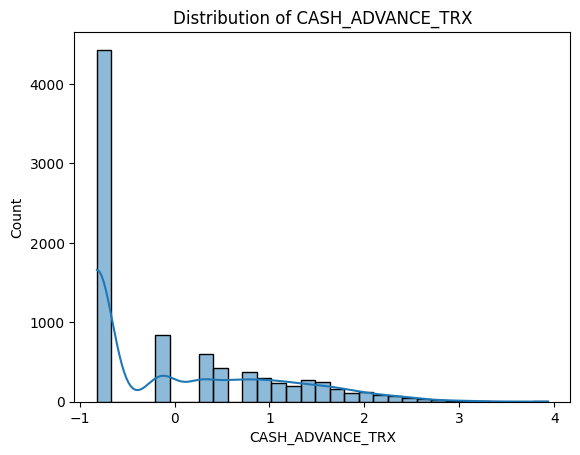

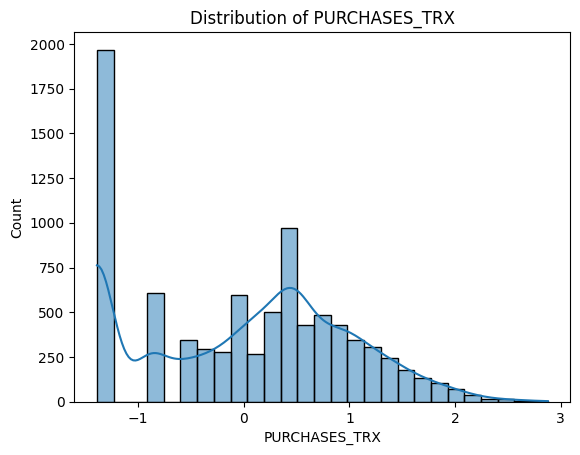

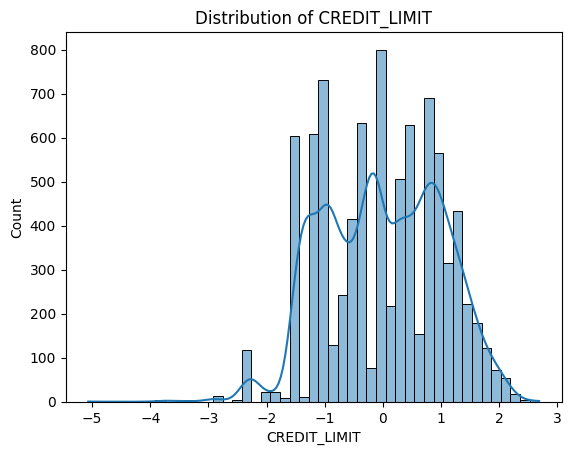

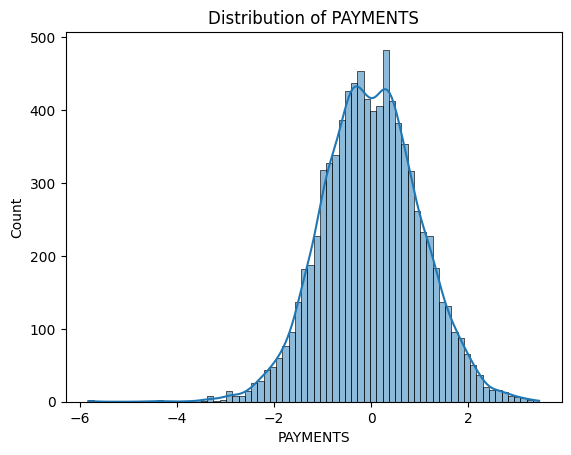

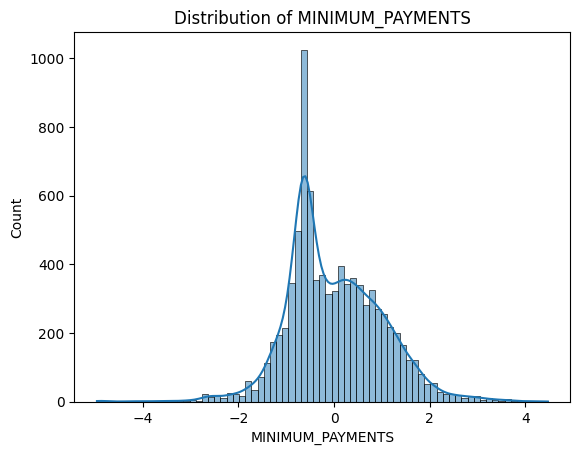

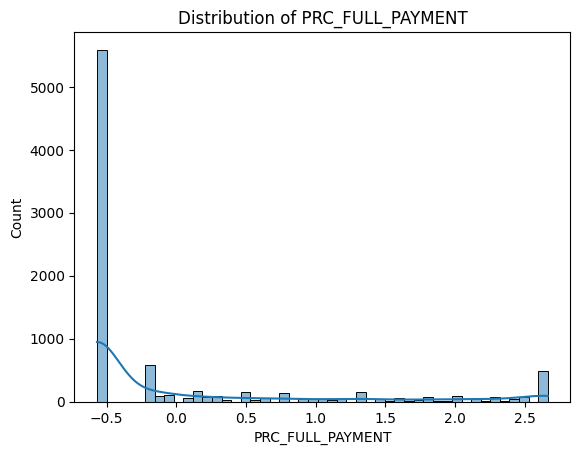

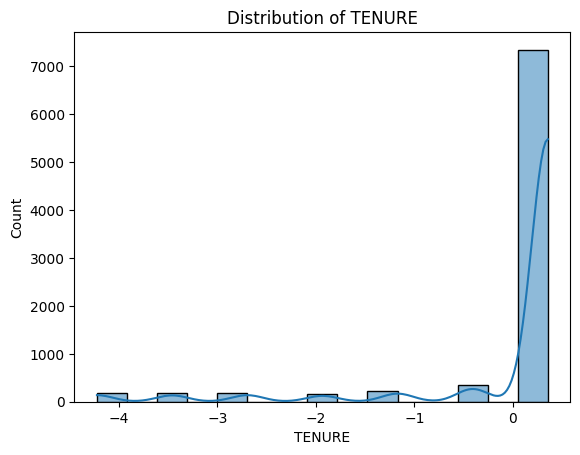

In [ ]:
#Visualizing distribution of normalized datasets
for column in data_normalized.select_dtypes(include=np.number).columns:
    sns.histplot(data_normalized[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## 1.b Here Plotted the Heatmap

## and dropped all the variable (threshold > 0.85)

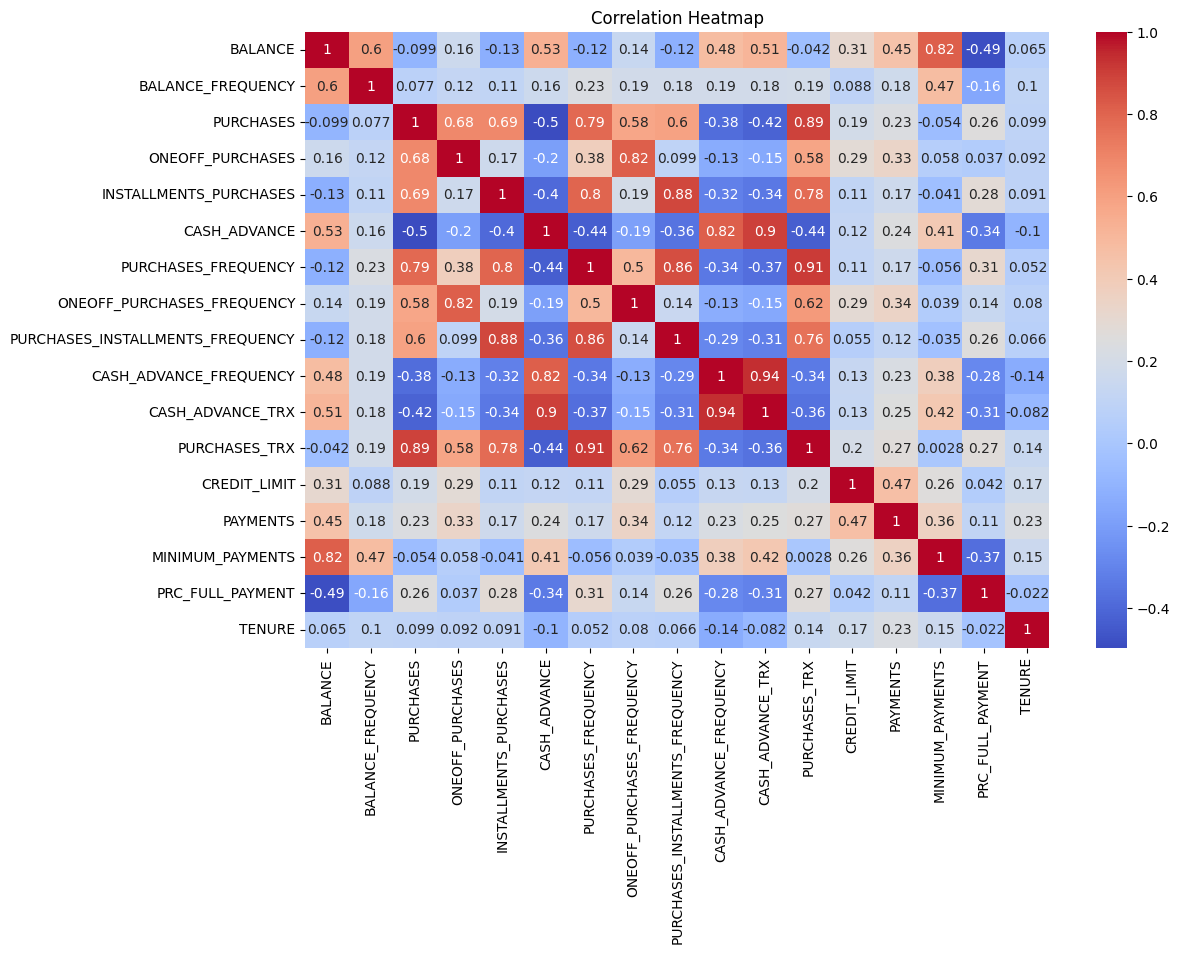

Dropped columns: ['PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']


In [ ]:
# Code for correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_normalized.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Droped highly correlated variables (threshold > 0.85)
correlation_matrix = data_normalized.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
data_cleaned = data_normalized.drop(columns=to_drop)\
# printing dropped column
print(f"Dropped columns: {to_drop}")


## These are the Column Dropped :


['PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']


---





# 2. Clustering

## 2.a

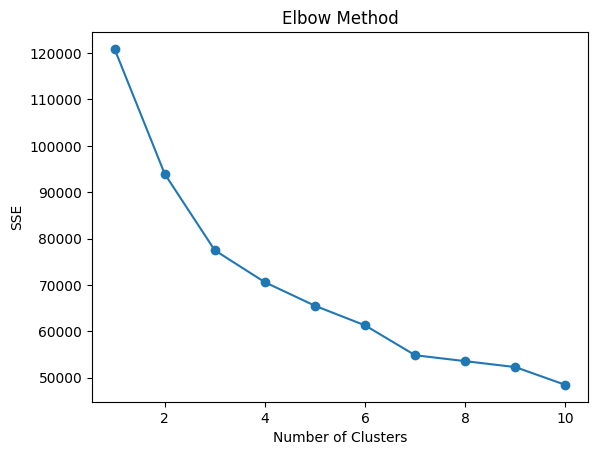

Silhouette Score for K-Means: 0.24151516873495596


In [ ]:
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Optimal k (choose based on elbow point)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cleaned['KMeans_Cluster'] = kmeans.fit_predict(data_cleaned)

# Silhouette Score
silhouette_avg = silhouette_score(data_cleaned, data_cleaned['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_avg}")


### Silhouette Score for K-Means: 0.24151516873495596

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.22, min_samples=6)  # Adjusted eps and min_samples
data_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(data_cleaned)

# Compare number of clusters
print("K-Means Clusters:", len(data_cleaned['KMeans_Cluster'].unique()))
print("DBSCAN Clusters:", len(data_cleaned['DBSCAN_Cluster'].unique()))


K-Means Clusters: 4
DBSCAN Clusters: 4


## 2.b  Here by adjusting eps and min saples I got same number of cluster (eps=0.22, min_samples=6)

##. K-Means Clusters: 4
##. DBSCAN Clusters: 4

## 2 (c) Using the cluster assignment as the label, visualizing the t-sne embedding

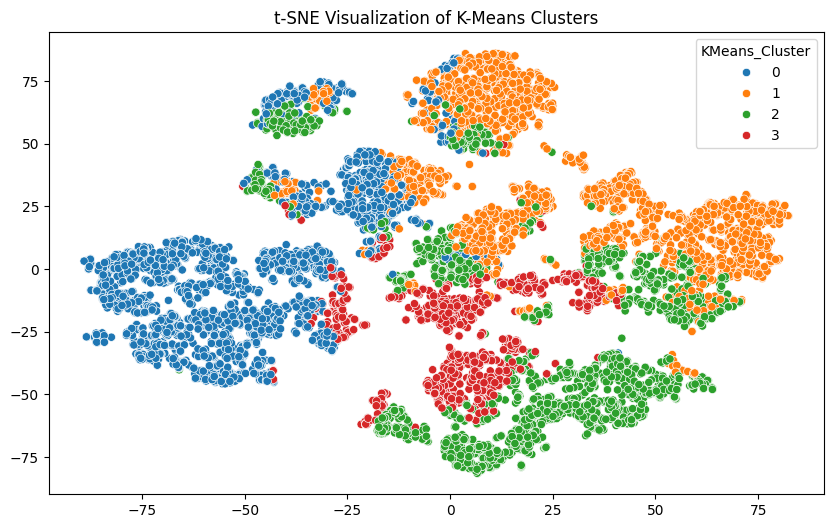

In [ ]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_cleaned.drop(['KMeans_Cluster', 'DBSCAN_Cluster'], axis=1))
# plotting figure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data_cleaned['KMeans_Cluster'], palette='tab10')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.show()


## 2.(d) Naming each Cluster

In [ ]:
# Example names
cluster_names = {
    0: "Reckless Spenders",
    1: "Moderate Spenders",
    2: "Savers",
    3: "Luxury Shoppers"
}
data_cleaned['Cluster_Name'] = data_cleaned['KMeans_Cluster'].map(cluster_names)
print(data_cleaned[['KMeans_Cluster', 'Cluster_Name']].drop_duplicates())
# printing the K means cluster and Cluster name


   KMeans_Cluster       Cluster_Name
0               2             Savers
1               0  Reckless Spenders
2               1  Moderate Spenders
8               3    Luxury Shoppers


KMeans_Cluster       Cluster_Name

   0                    *2*              Savers

   1                      0             Reckless Spenders

   2                      1             Moderate Spenders

   8                      3             Luxury Shoppers

---



# 3. PCA

### 3(a).  Normalizing

In [ ]:
# Normalizing using standard scaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(
    data_cleaned.drop(['KMeans_Cluster', 'DBSCAN_Cluster', 'Cluster_Name'], axis=1)
)

# Here Trained The PCA
pca = PCA()
pca.fit(data_normalized)

# Printing explained variance for each component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance_ratio}")


Explained variance ratio for each component: [0.29430436 0.24700647 0.09354493 0.08199746 0.07766083 0.05018203
 0.04446649 0.03581145 0.02457231 0.01803143 0.01221205 0.00966487
 0.00613061 0.0044147 ]


In [ ]:
cumulative_variance = np.cumsum([0.29430436, 0.24700647, 0.09354493, 0.08199746,
                                 0.07766083, 0.05018203, 0.04446649, 0.03581145,
                                 0.02457231, 0.01803143, 0.01221205, 0.00966487,
                                 0.00613061, 0.0044147])
print(cumulative_variance)


[0.29430436 0.54131083 0.63485576 0.71685322 0.79451405 0.84469608
 0.88916257 0.92497402 0.94954633 0.96757776 0.97978981 0.98945468
 0.99558529 0.99999999]


### Here from above result To retain 95% of the variance, the first 9 components are sufficient

## 3.(b) Here Plotted variance vs PCA dimension

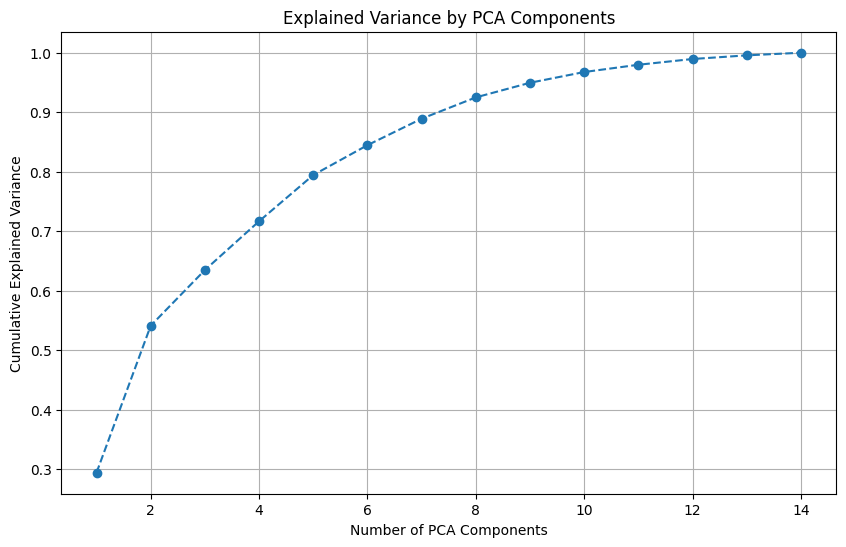

Number of components to retain 95% variance: 10


In [ ]:
# # Cumulative explained variance
# cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to retain (e.g., explaining 95% of variance)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")


### Number of components to retain 95% variance: 10

# 3.(c)

Taking n component as 10

In [ ]:
# Reduce dimensionality to retain 95% variance
n_components_95 = 10
pca = PCA(n_components=n_components_95)
data_reduced = pca.fit_transform(data_normalized)

# Transform back to the original space (reconstruction)
data_reconstructed = pca.inverse_transform(data_reduced)

# Compute Mean Squared Error (MSE) between original and reconstructed data
mse = mean_squared_error(data_normalized, data_reconstructed)
print(f"Reconstruction MSE with {n_components_95} components: {mse}")


Reconstruction MSE with 10 components: 0.032422231204348805


## 3.(c) Here Got Reconstruction MSE with 10 components: 0.032422231204348805

## References

[1] Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.

[2] OpenAI. (2024). ChatGPT

[3] Pandas documentation. https://pandas.pydata.org/docs/


[4] Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.

video-https://drive.google.com/drive/folders/1wCblDOWGNER1k_8eagq9TkeIXva0BKV3?usp=sharing